In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import torch.nn as nn

## Generate Dataset

In [2]:
centers = [[1, 0], [5, 0]]
X, y = datasets.make_blobs(random_state=5, centers=centers)
print (X[0]) 
print (y[0]) # point X[0] is in group 1

[7.07361553 0.70979786]
1


## Show Blobs

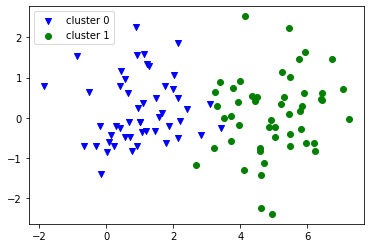

In [3]:
plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            c='blue',
            marker='v',
            label='cluster 0')

plt.scatter(X[y == 1,0],
            X[y == 1,1],
            c='green',
            marker='o',
            label='cluster 1')
plt.legend(loc='upper left')
plt.show()

## Create Our Model (Sigmoid Activation)

In [4]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
      super().__init__() 
      self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
      pred = self.linear(x)
      pred = torch.sigmoid(pred)
      return pred
    def predict(self, x):
      pred = self.forward(x)
      if pred >= 0.5:
        return 1
      else:
        return 0

## Define our model

In [5]:
torch.manual_seed(5)
model = Model(2, 1)
print (model)
print (list(model.parameters()))

Model(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
[Parameter containing:
tensor([[ 0.4670, -0.5288]], requires_grad=True), Parameter containing:
tensor([0.5762], requires_grad=True)]


## Plot the Graph

[Parameter containing:
tensor([[ 0.4670, -0.5288]], requires_grad=True), Parameter containing:
tensor([0.5762], requires_grad=True)]


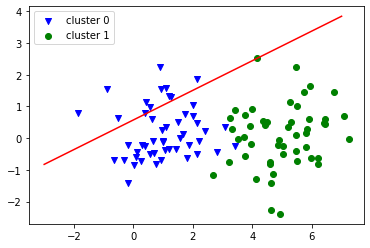

In [7]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
print (list(model.parameters()))

# extract the number of weight and bias.
def get_parameters():
  return w1.item(), w2.item(), b[0].item()

def plot_graph():
  w1, w2, b1 = get_parameters()
  # To plot a line, we just need two data points
  x1 = np.array([-3, 7]) 
  y1 = w1*x1 + b1
  plt.plot(x1, y1, color='red')
  plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            c='blue',
            marker='v',
            label='cluster 0')

  plt.scatter(X[y == 1,0],
              X[y == 1,1],
              c='green',
              marker='o',
              label='cluster 1')
  plt.legend(loc='upper left')
  plt.show()

plot_graph()

## Training in action

In [7]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.05)

In [8]:
X_tensor = torch.Tensor(X)
y_tensor = torch.Tensor(y).reshape(100, 1)
epochs = 1000

for i in range(epochs):
  y_pred = model.forward(X_tensor)
  loss = criterion(y_pred, y_tensor)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

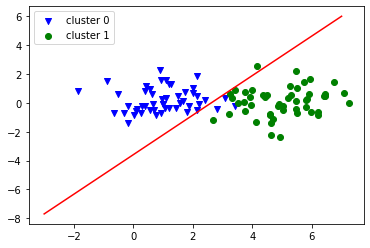

In [9]:
plot_graph()

## New Prediction

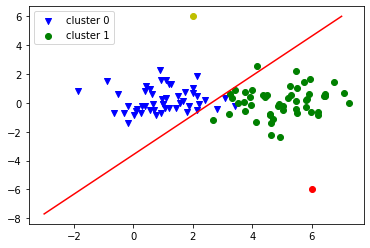

In [10]:
point_1 = torch.Tensor([6.0, -6.0])
point_2 = torch.Tensor([2.0, 6.0])
plt.plot(point_1.numpy()[0], point_1.numpy()[1], 'ro')
plt.plot(point_2.numpy()[0], point_2.numpy()[1], 'yo')
plot_graph()

In [13]:
print ("Point A in the group:",  model.predict(point_1))
print ("Point B in the group:", model.predict(point_2))

Point A in the group: 1
Point B in the group: 0
